In [1]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
dataset = pd.read_csv('wine.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [3]:
dataset['quality'] = dataset['quality'].map({'bad': 0, 'good': 1})
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [4]:
# Separating the features (X) and targets (Y)
X = dataset.drop('quality', axis = 1)
y = dataset['quality']

In [5]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Splitting the model into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 10)

In [7]:
# Build and fit the model on the data
model = AdaBoostClassifier(n_estimators = 150)

model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=150)

In [8]:
# Predicting on our test set
predictions = model.predict(X_test)

Accuracy:  0.7291666666666666

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       228
           1       0.73      0.76      0.75       252

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480


Confusion Matrix
[[159  69]
 [ 61 191]]



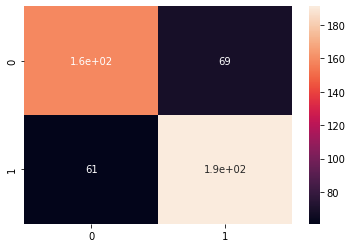

In [9]:
# Checking classification metrics of the model
print('Accuracy: ', accuracy_score(y_test, predictions))
print()
print('Classification Report')
print(classification_report(y_test, predictions))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print()
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)

In [10]:
# Using Logistic Regression as the base model
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_new = AdaBoostClassifier(n_estimators = 150, base_estimator = model_log)

model_new.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=150)

In [11]:
# Predicting with our new model
predictions_new = model_new.predict(X_test)

Accuracy:  0.7375

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       228
           1       0.73      0.79      0.76       252

    accuracy                           0.74       480
   macro avg       0.74      0.73      0.74       480
weighted avg       0.74      0.74      0.74       480


Confusion Matrix
[[156  72]
 [ 54 198]]



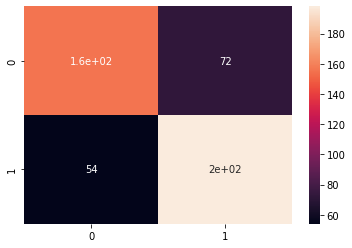

In [12]:
# Checking classification metrics of the new model
print('Accuracy: ', accuracy_score(y_test, predictions_new))
print()
print('Classification Report')
print(classification_report(y_test, predictions_new))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions_new))
print()
sns.heatmap(confusion_matrix(y_test, predictions_new), annot = True)

In [13]:
# Thus AdaBoost works better here when Logistic Regression is used as a base model than when Decision Trees are used as 
# a base model by default. Although the performance was better by very small margin. 